In [1]:
from qiskit import QuantumCircuit
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from azure.quantum.qiskit import AzureQuantumProvider
import time
from IPython.display import clear_output
import random
import numpy as np

In [8]:
from azure.quantum.qiskit import AzureQuantumProvider
provider = AzureQuantumProvider (
    resource_id = "/subscriptions/b1d7f7f8-743f-458e-b3a0-3e09734d716d/resourceGroups/aq-hackathons/providers/Microsoft.Quantum/Workspaces/aq-hackathon-01",
    location = "eastus"
)

## Nature

In [10]:
# GETTING THE QUBIT POSITIONS FOR EACH PLAYER

def Get_qubits(n_qubits=10,mode="single_player"):
    #n_qubits = 10
    Qubit_list = range(n_qubits)
    
    Player1_list = []
    Player2_list = []
    used_qubits = []
    
    if mode == "single_player":
        
        for i in range(int(n_qubits/2)):
                        
            while True:
                val1 = int(input("Qubit "+str(i)+" to initialize"))
                if val1 in used_qubits or val1 not in range(10):
                    print("Qubit not available")
                    continue
                else:
                    Player1_list.append(val1)
                    used_qubits.append(val1)
                    break

            while True:
                val2 = np.random.randint(n_qubits)
                if val2 in used_qubits:
                    continue
                else:
                    Player2_list.append(val2)
                    used_qubits.append(val2)
                    break
        
        print("")
        print("PLAYER QUBITS :",Player1_list)

    
    elif mode == "two_player":
        
        for i in range(int(n_qubits/2)):
            num = np.random.randint(2)
            if num==0:
                while True:
                    val1 = int(input("Player ONE qubit "+str(i)+" to initialize"))
                    if val1 in used_qubits or val1 not in range(10):
                        print("Qubit not available")
                        continue
                    else:
                        Player1_list.append(val1)
                        used_qubits.append(val1)
                        break

                while True:
                    val2 = int(input("Player TWO qubit "+str(i)+" to initialize"))
                    if val2 in used_qubits or val2 not in range(10):
                        print("Qubit not available")
                        continue

                    else:
                        Player2_list.append(val2)
                        used_qubits.append(val2)
                        break


            else:
                while True:
                    val2 = int(input("Player TWO qubit "+str(i)+" to initialize"))
                    if val2 in used_qubits or val2 not in range(10):
                        print("Qubit not available")
                        continue

                    else:
                        Player2_list.append(val2)
                        used_qubits.append(val2)
                        break

                while True:
                    val1 = int(input("Player ONE qubit "+str(i)+" to initialize"))
                    if val1 in used_qubits or val1 not in range(10):
                        print("Qubit not available")
                        continue
                    else:
                        Player1_list.append(val1)
                        used_qubits.append(val1)
                        break        
        print("")
        print("PLAYER ONE QUBITS :",Player1_list)
        print("PLAYER TWO QUBITS :",Player2_list) 
        
    return Player1_list,Player2_list


# INITIAL CIRCUIT OF EACH PLAYER

def Player_circuits(Lists,n_qubits=10,mode="single_player"):
    
    First_player_list,Second_player_list = Lists
       
    if mode == "single_player":
        
        Player_circuit = QuantumCircuit(n_qubits)

        for index in First_player_list:
            while True:
                val = int(input("Value of qubit "+str(index)))
                if val==1:
                    Player_circuit.x(index)
                    break
                elif val==0:
                    Player_circuit.id(index)
                    break
                else:
                    print("Not a possible value") 

        #Player2_circuit = QuantumCircuit(n_qubits)

        for index in Second_player_list:
            val = np.random.randint(2)
            if val==1:
                Player_circuit.x(index)
                
            elif val==0:
                Player_circuit.id(index)
                
                
    
    elif mode == "two_player":
        
        Player_circuit = QuantumCircuit(n_qubits)

        for index in First_player_list:
            while True:
                val = int(input("Value of Player ONE qubit "+str(index)))
                if val==1:
                    Player_circuit.x(index)
                    break
                elif val==0:
                    Player_circuit.id(index)
                    break
                else:
                    print("Not a possible value") 

        #Player2_circuit = QuantumCircuit(n_qubits)
        print("")
        
        for index in Second_player_list:
            while True:
                val = int(input("Value of Player TWO qubit "+str(index)))
                if val==1:
                    Player_circuit.x(index)
                    break
                elif val==0:
                    Player_circuit.id(index)
                    break
                else:
                    print("Not a possible value")

                    
    return Player_circuit


# DISPLAY THE CIRCUIT AND CLEAR THE OUTPUT
def Show_Circuit(qc,secs=10):
    print("YOU ONLY HAVE "+str(secs)+" SECONDS TO SEE THIS CIRCUIT")
    display(qc.draw("mpl",style={'name':'iqx'}))
    time.sleep(secs)
    clear_output()
    
# DETERMINE THE NUMBER OF 1 IN THE MOST FREQUENT MEASUREMENT    
def Number_of_alive_cells(counts):
    player_res = counts.most_frequent()
    alive_cells = 0
    dead_cells = 0
    for i in player_res:
        if i == '1':
            alive_cells += 1
        else:
            dead_cells += 1
            
          
    return alive_cells,dead_cells    


# TYPE 1 OPERATION
def Operation1(qc,q0,q1,q2):
    qc.ccx(q0,q2,q1)

    
# TYPE 2 OPERATION    
def Operation2(qc,q0,q1,q2):
    qc.x(q1)
    qc.cx(q0,q1)
    qc.cx(q2,q1)
       
# LOAD ROTATIONS
def load_rotations(qc):
    n_qubits = qc.num_qubits
    for i in range(n_qubits):
        num = np.random.randint(10)
        if num<3:
            qc.ry(np.pi/2.5,i)
        
# RANDOM CIRCUIT
def Create_random_circuit(qc,load_rots=False):
    n_qubits = qc.num_qubits
    
    if load_rots==True:
        load_rotations(qc)
    
    for i in range(int(n_qubits/2)):
        qubit = 1 + np.random.randint(n_qubits-2)
        num = np.random.randint(2)
        if num==0:
            Operation1(qc,qubit-1,qubit,qubit+1)
        else:
            Operation2(qc,qubit-1,qubit,qubit+1)    
        
        
# RUN THE CIRCUITS
def Run_circuit(qc, ): 
    sim = provider.get_backend('ionq.simulator')
    qpu = provider.get_backend('ionq.qpu')
    counts = execute(qc,backend=sim,shots=2048).result().get_counts()
    return counts         


# DETERMINE THE WINNER 
def who_wins(alive_cells,dead_cells):
    if alive_cells>dead_cells:
        print("Player 1 wins")
    elif alive_cells<dead_cells:
        print("Player 2 wins")
    else:
        print("It's a tie!")

In [11]:
n_qubits = 10
random_qc = QuantumCircuit(n_qubits)

Create_random_circuit(random_qc,load_rots=True)
Show_Circuit(random_qc)

In [12]:
Lists = Get_qubits(n_qubits,"single_player")

Qubit not available

PLAYER QUBITS : [5, 6, 8, 3, 2]


In [13]:
Circuits = Player_circuits(Lists,n_qubits,mode="single_player")

In [14]:
qc = Circuits.compose(random_qc)
qc.measure_all()    
print(qc)

         ┌───┐┌──────────┐                                                   ░ »
    q_0: ┤ X ├┤ Ry(2π/5) ├───────────────────────────────────────────────────░─»
         ├───┤└──────────┘                                                   ░ »
    q_1: ┤ I ├─────■─────────────────────────────────────────────────────────░─»
         ├───┤   ┌─┴─┐                                                       ░ »
    q_2: ┤ X ├───┤ X ├───────────────────────────────────────────────────────░─»
         ├───┤   └─┬─┘                                                       ░ »
    q_3: ┤ I ├─────■─────────────────────────────────────────────────────────░─»
         ├───┤┌──────────┐                                                   ░ »
    q_4: ┤ X ├┤ Ry(2π/5) ├───────────────────────────────────────────────────░─»
         ├───┤├──────────┤                                                   ░ »
    q_5: ┤ I ├┤ Ry(2π/5) ├───────■──────────────■────────────────────────────░─»
         ├───┤├──────────┤┌─

In [15]:
counts = Run_circuit(qc)
plot_histogram(counts)
alive,dead = Number_of_alive_cells(counts)
who_wins(alive,dead)

............Player 2 wins


In [16]:
## Nurture

In [3]:
class Nurture:
    def __init__(self, num_qubits=4, num_cnots=2, num_rotations=2):
        self.num_qubits = num_qubits
        self.circuit = QuantumCircuit(num_qubits, num_qubits)
        self.computer_gates = ['h']+["cnot"]*num_cnots + self.random_rotations(num_rotations-1)
        self.player_gates = ['h']+["cnot"]*num_cnots + self.random_rotations(num_rotations-1)
        self.num_gates = num_cnots+num_rotations
    
    def random_rotations(self, num_rotations):
        poss_rotations = ["h", "rx_pi/4", "ry_pi/4", "rz_pi/4", "x", "y", "z"]
        return [poss_rotations[random.randrange(0,len(poss_rotations))] for _ in range(num_rotations)]

    def play_game(self, num_hidden_moves=2, backend_name='ionq.simulator',shots=100):
        gates_played = []
        qubits_acted_on = []
        for game_round in range(self.num_gates):
            player_message = "Please enter gate you want to play followed by the qubits the gate should act on. Your available gates are: "+str(self.player_gates)
            if 2*game_round - num_hidden_moves > 0:
                player_message = "gate "+ str(gates_played[2*game_round-num_hidden_moves-1])+" was played on qubit(s) "+str(qubits_acted_on[2*game_round-num_hidden_moves-1])+" "+str(num_hidden_moves+1)+" moves ago."+"\n"+player_message            

            inp = input(player_message).split()
            gate, qubits = inp[0], inp[1:]
            qubits = [int(num) for num in qubits]
            self.player_gates.remove(gate)
            gates_played.append(gate)
            qubits_acted_on.append(qubits)
            
            # computer's turn
            comp_gate = self.computer_gates[random.randrange(0, len(self.computer_gates))]
            gates_played.append(comp_gate)
            self.computer_gates.remove(comp_gate)
            comp_qubits = [random.randrange(0, self.num_qubits)]
            if comp_gate=='cnot':
                rand_qubit2 = random.randrange(0, self.num_qubits)
                while comp_qubits[0] == rand_qubit2: # ensures valid cnot
                    rand_qubit2 = random.randrange(0, self.num_qubits)
                comp_qubits.append(rand_qubit2)
            qubits_acted_on.append(comp_qubits)

        self.make_circuit(gates_played, qubits_acted_on)
        backend = provider.get_backend(backend_name)
        job = backend.run(self.circuit, shots=shots)
        job_id = job.id()
        self.job = job
        self.display_results()

    def display_results(self):
        job = self.job
        result = job.result()
        # The histogram returned by the results can be sparse, so here we add any of the missing bitstring labels.
        counts = {format(n, "0"+str(self.num_qubits)+"b"): 0 for n in range(2**self.num_qubits)}
        counts.update(result.get_counts(self.circuit))
        num_zeros = 0
        num_ones = 0
        for bitstring in counts:
            count = counts[bitstring]
            num_zeros+=bitstring.count('0')*count
            num_ones+=bitstring.count('1')*count
        if num_ones > num_zeros:
            print("You Win!")
        else:
            print("Computer Wins")
        

    def make_circuit(self, gates_played, qubits_acted_on):
        for gate, qubits in zip(gates_played, qubits_acted_on):
            if gate=='cnot':
                self.circuit.cx(*qubits)
            elif gate=='h':
                self.circuit.h(qubits[0])
            elif gate=='rx_pi/4':
                self.circuit.rx(np.pi/4, qubits[0])
            elif gate=='ry_pi/4':
                self.circuit.ry(np.pi/4, qubits[0])
            elif gate=='rz_pi/4':
                self.circuit.rz(np.pi/4, qubits[0])
            elif gate=='x':
                self.circuit.x(qubits[0])
            elif gate=='y':
                self.circuit.y(qubits[0])
            elif gate=='z':
                self.circuit.z(qubits[0])
        self.circuit.measure(list(range(self.num_qubits)), list(range(self.num_qubits)))
                



In [4]:
new_game = Nurture()
new_game.play_game()

............Computer Wins


In [6]:
new_game.display_results()

Computer Wins


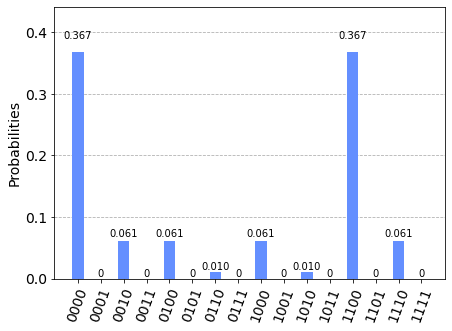

In [5]:
job = new_game.job
result = job.result()
counts = {format(n, "0"+str(new_game.num_qubits)+"b"): 0 for n in range(2**new_game.num_qubits)}
counts.update(result.get_counts(new_game.circuit))
plot_histogram(counts)